In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [45]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [46]:

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
df.shape

(1599, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<ipython-input-49-363119e6b9d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=df ,palette=colors)


<Axes: xlabel='quality', ylabel='alcohol'>

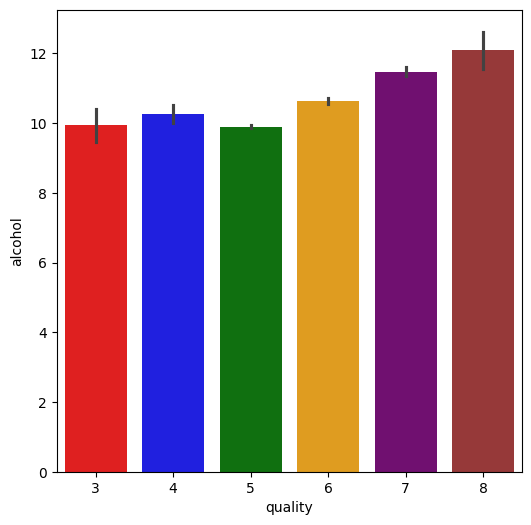

In [49]:
fig=plt.figure(figsize=(6,6))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
sns.barplot(x='quality', y='alcohol', data=df ,palette=colors)

<ipython-input-50-fe879d40f90f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'volatile acidity', data = df, palette = colors)


<Axes: xlabel='quality', ylabel='volatile acidity'>

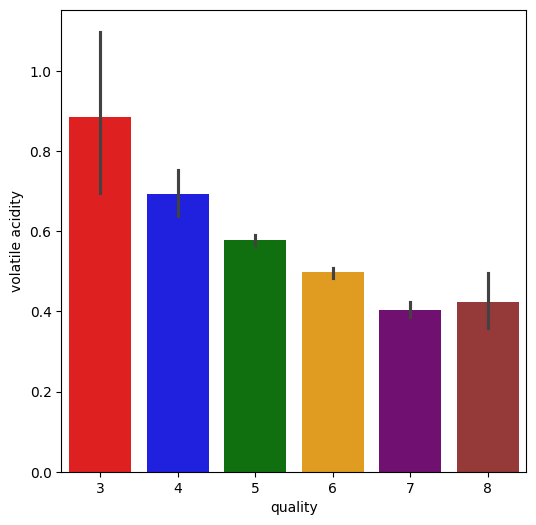

In [50]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df, palette = colors)

In [51]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

Preprocessing Data for performing Machine learning algorithms

In [52]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [53]:
#Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])

In [55]:
df['quality'].value_counts() # this shows how many wine consider as good quality and how many consider as bad

,count
quality,
0,1382
1,217


<ipython-input-60-4482b970d023>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=df,palette=colors)
<ipython-input-60-4482b970d023>:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='quality',data=df,palette=colors)


<Axes: xlabel='quality', ylabel='count'>

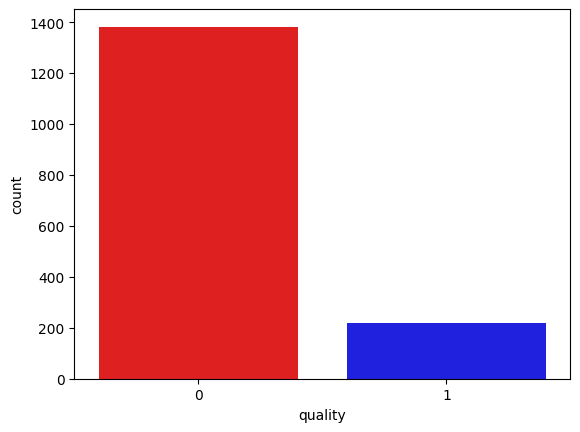

In [60]:
sns.countplot(x='quality',data=df,palette=colors)


In [62]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [63]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [65]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## **Our training and testing data is ready now to perform machine learning algorithm**

Random Forest Classifier(Random Forest is a machine learning algorithm used for classification and regression. It works by building multiple decision trees and combining their outputs (majority vote for classification or average for regression).

In [66]:
#Initialize Random Forest Classifier with 200 trees
rfc = RandomForestClassifier(n_estimators=200)
# Train the Random Forest model on training data
rfc.fit(X_train, y_train)
# Predict outcomes for the test data
pred_rfc = rfc.predict(X_test)

In [67]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.65      0.36      0.47        47

    accuracy                           0.88       320
   macro avg       0.78      0.66      0.70       320
weighted avg       0.86      0.88      0.86       320



Random forest gives the accuracy of 88%

In [68]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 30  17]]


Support vector classifier

In [69]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [70]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Let's try to increase our accuracy of models

Grid Search CV

In [71]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [72]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [73]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [74]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



SVC improves from 88% to 90% using Grid search CV


Cross Validation Score for random forest and SGD

In [75]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.910894438976378